#Analysis of changes in the exchange rate (ruble and zloty) to the euro over 20 years

This notebook is an analysis of changes in currencies such as the ruble and the zloty against the euro over a period of almost 20 years (1999-2022). The dataset used is [Daily Exchange Rates per Euro 1999-2022](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). 

Here I will conduct a brief analysis for two currencies, which will contain

-general analysis of exchange rate changes

-analysis of exchange rate changes during financial crises

-analysis of exchange rate changes and how they relate to the President (in Russia)

*On this point, it is worth noting that the governing party certainly affects the economic life of the country, but there is also a high probability of unforeseen crises (Coronavirus), so this point should be taken into attention as an interesting statistic rather than an accurate analysis. For a more accurate picture, it would be necessary to examine not only the actions of the government in a certain period of time, but also the general world situation and local conflicts.*




#Explonatory Analysis

In [26]:
#Reading the file and importing Pandas

import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv', encoding='ISO-8859-1')

#Looking on data
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-06-15,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.5290,18.0465,1.0431,16.7111
1,2022-06-14,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.5660,18.0600,1.0452,16.7959
2,2022-06-13,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.4250,18.0495,1.0455,16.8070
3,2022-06-10,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.7740,18.0116,1.0578,16.5209
4,2022-06-09,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.0790,18.5104,1.0743,16.4132


In [27]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6063,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6064,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6065,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6066,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6067,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [28]:
#Main info about data

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

#Data Cleaning

In [29]:
#Take only the data we need for further work and rename columns

exchange_rates.rename(columns={'[Russian rouble ]': 'Rouble',
                               '[Polish zloty ]': 'Zloty',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],Rouble,[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [30]:
#Create a new dataset to work with the rouble

euro_to_rouble = exchange_rates[['Time', 'Rouble']].copy()
euro_to_rouble['Rouble'].value_counts()

-           62
39.6750      4
35.2250      4
43.9800      4
40.6500      4
            ..
34.7170      1
34.6410      1
34.5840      1
34.6900      1
117.2010     1
Name: Rouble, Length: 5705, dtype: int64

In [31]:
#Create a new dataset to work with the zloty

euro_to_zloty = exchange_rates[['Time', 'Zloty']].copy()
euro_to_rouble['Rouble'].value_counts()

-           62
39.6750      4
35.2250      4
43.9800      4
40.6500      4
            ..
34.7170      1
34.6410      1
34.5840      1
34.6900      1
117.2010     1
Name: Rouble, Length: 5705, dtype: int64

#Rouble to Euro

###General Overlooking


In [32]:
#Changing data type

euro_to_rouble = euro_to_rouble[euro_to_rouble['Rouble'] != '-']
euro_to_rouble['Rouble'] = euro_to_rouble['Rouble'].astype(float)
euro_to_rouble.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 0 to 6067
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6006 non-null   datetime64[ns]
 1   Rouble  5932 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


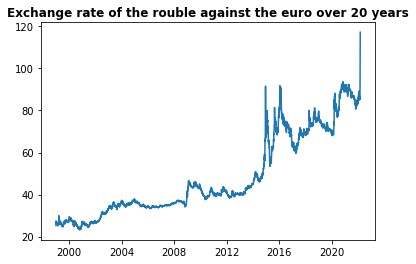

In [33]:
#Creating a first plot showing exchange rate over 20 years

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_rouble['Time'], euro_to_rouble['Rouble'])
plt.title('Exchange rate of the rouble against the euro over 20 years', weight='bold')
plt.show()

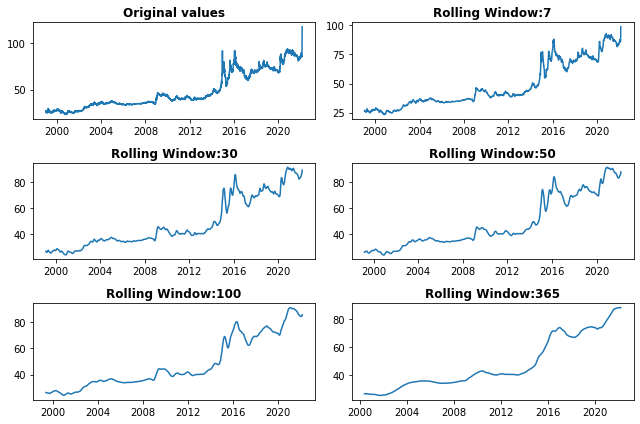

In [34]:
#Rolling mean

plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_rouble['Time'], euro_to_rouble['Rouble'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_rouble['Time'],
             euro_to_rouble['Rouble'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

###Analysis 1. Great Recession in Russia

More information about Great Recession in Russia 

[Great Recession in Russia](https://en.wikipedia.org/wiki/Great_Recession_in_Russia)

[Roots of Recession](https://www.bruegel.org/policy-brief/systemic-roots-russias-recession)

[Reforms after Recession](https://carnegieendowment.org/2010/03/30/russia-reform-after-great-recession-pub-40450)

In [35]:
#Creating new column with rolling

euro_to_rouble['rolling_mean'] = euro_to_rouble['Rouble'].rolling(30).mean()
euro_to_rouble

,Time,Rouble,rolling_mean
0,1999-01-04,25.2875,NaN
1,1999-01-05,26.5876,NaN
2,1999-01-06,27.4315,NaN
3,1999-01-07,26.9876,NaN
4,1999-01-08,27.2075,NaN
...,...,...,...
6063,2022-06-09,NaN,NaN
6064,2022-06-10,NaN,NaN
6065,2022-06-13,NaN,NaN
6066,2022-06-14,NaN,NaN


In [84]:
#Creating dataset for showing crisis and needeed period

financial_crisis = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2006
                   ) & (euro_to_rouble['Time'].dt.year <= 2010)]
financial_crisis_8_9 = euro_to_rouble.copy(
                   )[(euro_to_rouble.Time.dt.year >= 2008
                   ) & (euro_to_rouble.Time.dt.year <= 2009)]

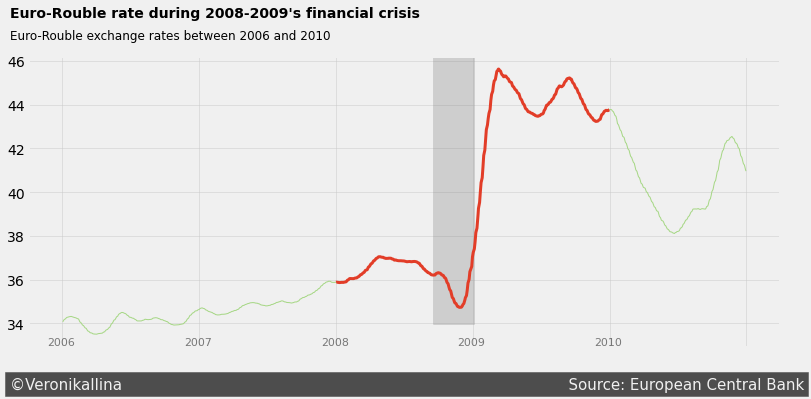

In [108]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2008-2009 period
ax.plot(financial_crisis_8_9['Time'],
        financial_crisis_8_9['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733412.0, xmax=733302.0, ymin=0.08,
           alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 33, year, alpha=0.5, fontsize=11)
    x += 365

## Adding a title and a subtitle    
ax.text(732172.0, 48, "Euro-Rouble rate during 2008-2009's financial crisis",
        weight='bold')
ax.text(732172.0, 47, 'Euro-Rouble exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 31, '©VeronikaIlina' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=15)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

###Analysis 2. Russian financial crisis (2014–2016)

More about this crisis 

[Russian financial crisis (2014–2016)](https://en.wikipedia.org/wiki/Russian_financial_crisis_(2014%E2%80%932016)#:~:text=Crude%20oil%2C%20a%20major%20export,the%20broader%20Russo%2DUkrainian%20War.)

[What Caused the Russian Financial Crisis of 2014 and 2015](https://www.thebalance.com/what-caused-the-russian-financial-crisis-of-2014-and-2015-1979012)

[Currency Crisis in Russia on the Spun of 2014 and 2015: Causes and Consequences](https://www.sciencedirect.com/science/article/pii/S1877042815053161)

In [109]:
#Creating dataset for showing crisis and needeed period

financial_crisis1 = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2012
                   ) & (euro_to_rouble['Time'].dt.year <= 2016)]
financial_crisis_14_15= euro_to_rouble.copy(
                   )[(euro_to_rouble.Time.dt.year >= 2014
                   ) & (euro_to_rouble.Time.dt.year <= 2015)]

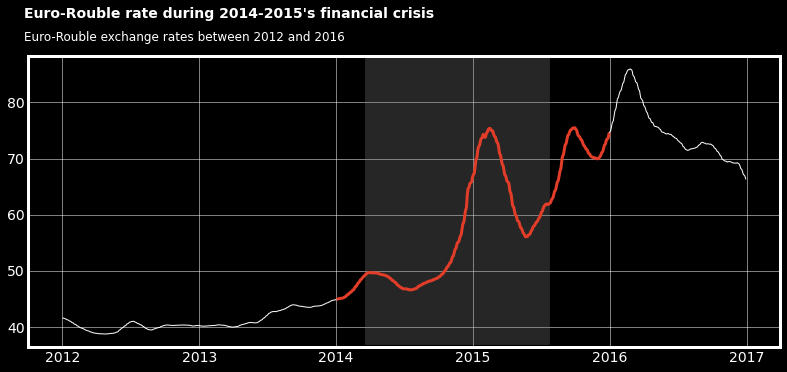

In [218]:
style.use('dark_background')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(financial_crisis1['Time'],
        financial_crisis1['rolling_mean'],
        linewidth=1, color='white')

### Highlighting the 2014-2015 period
ax.plot(financial_crisis_14_15['Time'],
        financial_crisis_14_15['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=735312.0, xmax=735802.0, ymin=0.01,
           alpha=0.3, color='grey')

## Adding a title and a subtitle    
ax.text(734400.0, 95, "Euro-Rouble rate during 2014-2015's financial crisis",
        weight='bold')
ax.text(734400.0, 91, 'Euro-Rouble exchange rates between 2012 and 2016',
        size=12)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

###Analysis 3. Coronavirus crisis

More about Coronavirus crisis 

[Russia’s Response to Its Spiraling COVID-19 Crisis Is Too Little, Too Late](https://carnegieendowment.org/2021/10/28/russia-s-response-to-its-spiraling-covid-19-crisis-is-too-little-too-late-pub-85677)

[How Russia is handling coronavirus](https://www.atlanticcouncil.org/event/how-russia-is-handling-the-coronavirus/)

[Russia - COVID-19 - Coronavirus crisis](https://countryeconomy.com/others/coronavirus/russia)

In [219]:
#Creating dataset for showing crisis and needeed period

financial_crisis2 = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2018
                   ) & (euro_to_rouble['Time'].dt.year <= 2022)]
financial_crisis_cor= euro_to_rouble.copy(
                   )[(euro_to_rouble.Time.dt.year >= 2020
                   ) & (euro_to_rouble.Time.dt.year <= 2021)]

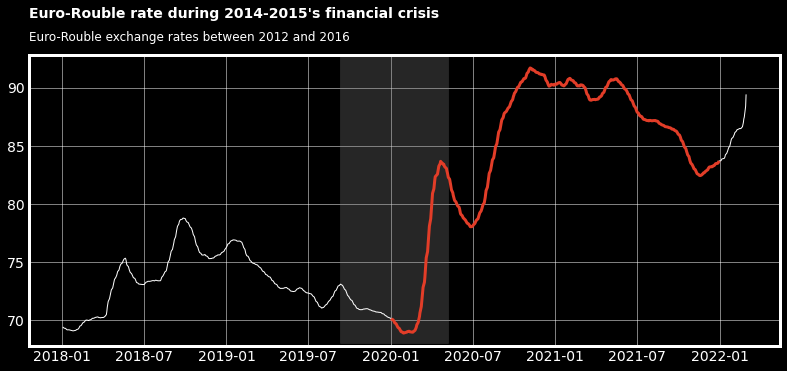

In [241]:
### Adding the plot
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(financial_crisis2['Time'],
        financial_crisis2['rolling_mean'],
        linewidth=1, color='white')

### Highlighting the 2014-2015 period
ax.plot(financial_crisis_cor['Time'],
        financial_crisis_cor['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=737312.0, xmax=737552.0, ymin=0.01,
           alpha=0.3, color='grey')

## Adding a title and a subtitle    
ax.text(736620.0, 96, "Euro-Rouble rate during 2014-2015's financial crisis",
        weight='bold')
ax.text(736620.0, 94, 'Euro-Rouble exchange rates between 2012 and 2016',
        size=12)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

###An analysis of exchange rates during Putin's and Medvedev's presidency

In [244]:
#Creating new datasets for the plot for showing every period separately

put_mev_put = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2000) & (euro_to_rouble['Time'].dt.year < 2021)]
put = put_mev_put.copy(
       )[put_mev_put['Time'].dt.year < 2008]
mev = put_mev_put.copy(
       )[(put_mev_put['Time'].dt.year >= 2008) & (put_mev_put['Time'].dt.year < 2012)]
put1 = put_mev_put.copy(
       )[(put_mev_put['Time'].dt.year >= 2012) & (put_mev_put['Time'].dt.year < 2021)]

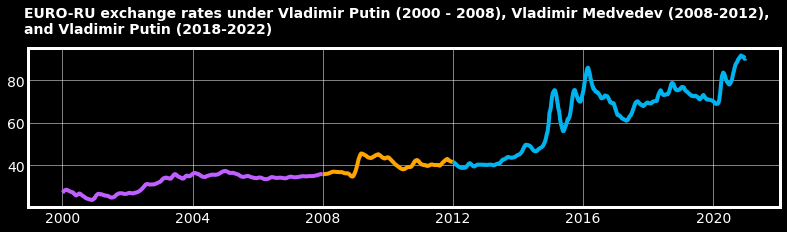

In [335]:
#Creating new combined plot

style.use('dark_background')
plt.figure(figsize=(12, 6))
ax = plt.subplot(2,1,2)

### Combined
ax.plot(put['Time'], put['rolling_mean'],
        color='#BF5FFF')
ax.plot(mev['Time'], mev['rolling_mean'],
        color='#ffa500')
ax.plot(put1['Time'], put1['rolling_mean'],
        color='#00B2EE')
ax.text(729690.0, 102, '''EURO-RU exchange rates under Vladimir Putin (2000 - 2008), Vladimir Medvedev (2008-2012),
and Vladimir Putin (2018-2022)''', fontsize=14, weight='bold', color='#FFFFFF')
ax.grid(alpha=0.5) 

#Zloty to Euro

###General Overlooking

In [51]:
#Change type of column from object to float

euro_to_zloty = euro_to_zloty[euro_to_zloty['Zloty'] != '-']
euro_to_zloty['Zloty'] = euro_to_zloty['Zloty'].astype(float)
euro_to_zloty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 0 to 6067
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6006 non-null   datetime64[ns]
 1   Zloty   6006 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


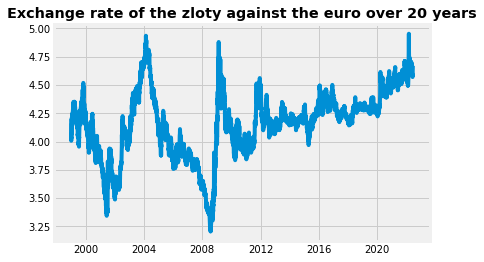

In [52]:
#Creating plot with overlook on exchange rates

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_zloty['Time'], euro_to_zloty['Zloty'])
plt.title('Exchange rate of the zloty against the euro over 20 years', weight='bold')
plt.show()

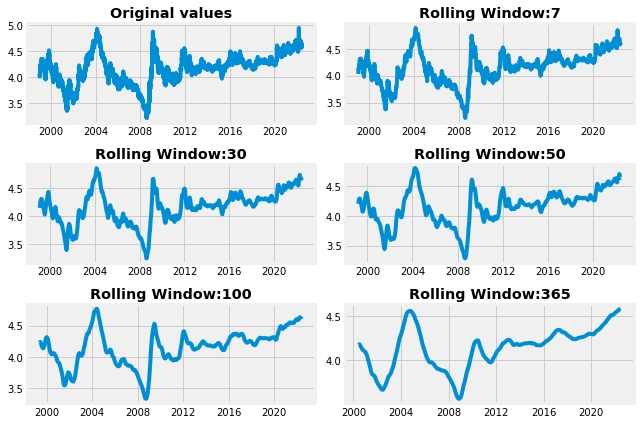

In [53]:
#Rolling mean

plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_zloty['Time'], euro_to_zloty['Zloty'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_zloty['Time'],
             euro_to_zloty['Zloty'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

###Analysis 1. IT bubble crisis

More about bubble crisis or Bańka Internetowa 

[Dot-com Bubble](https://en.wikipedia.org/wiki/Dot-com_bubble)

[Tech bubble](https://www.investopedia.com/terms/t/tech_bubble.asp)

[Stock Market crashes](https://www.fool.com/investing/stock-market/basics/crashes/)

In [54]:
euro_to_zloty['rolling_mean'] = euro_to_zloty['Zloty'].rolling(30).mean()
euro_to_zloty

,Time,Zloty,rolling_mean
0,1999-01-04,4.0712,NaN
1,1999-01-05,4.0245,NaN
2,1999-01-06,4.0065,NaN
3,1999-01-07,4.0165,NaN
4,1999-01-08,4.0363,NaN
...,...,...,...
6063,2022-06-09,4.5925,4.634487
6064,2022-06-10,4.6053,4.632063
6065,2022-06-13,4.6373,4.630473
6066,2022-06-14,4.6563,4.629267


In [349]:
financial_bubble = euro_to_zloty.copy(
                   )[(euro_to_zloty['Time'].dt.year >= 1999
                   ) & (euro_to_zloty['Time'].dt.year <= 2003)]
financial_crisis_b = euro_to_zloty.copy(
                   )[(euro_to_zloty.Time.dt.year >= 2000
                   ) & (euro_to_zloty.Time.dt.year <= 2001)]

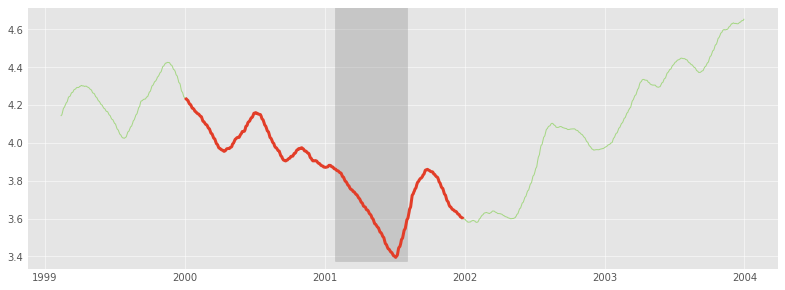

In [377]:
style.use('ggplot')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,4.5))
ax.plot(financial_bubble['Time'],
        financial_bubble['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 1999 - 2000 period
ax.plot(financial_crisis_b['Time'],
        financial_crisis_b['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=730512.0, xmax=730700.0, ymin=0.03,
           alpha=0.3, color='grey')

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

###Analysis 2. 2007-2009 Financial crisis

More read about 2007-2009 Financial crisis in Poland 

[Reasons Why Poland Avoided the 2007-2009 Recession](https://ssl-kolegia.sgh.waw.pl/pl/KAE/struktura/IRG/publikacje/Documents/pim86_2.pdf)

[Four ways Poland’s state bank helped it avoid recession](https://www.brookings.edu/blog/future-development/2015/06/12/four-ways-polands-state-bank-helped-it-avoid-recession/)

[How Poland became only EU nation to avoid recession](https://edition.cnn.com/2010/WORLD/europe/06/29/poland.economy.recession/index.html)

In [55]:
financial_crisis = euro_to_zloty.copy(
                   )[(euro_to_zloty['Time'].dt.year >= 2006
                   ) & (euro_to_zloty['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_zloty.copy(
                   )[(euro_to_zloty.Time.dt.year >= 2007
                   ) & (euro_to_zloty.Time.dt.year <= 2008)]

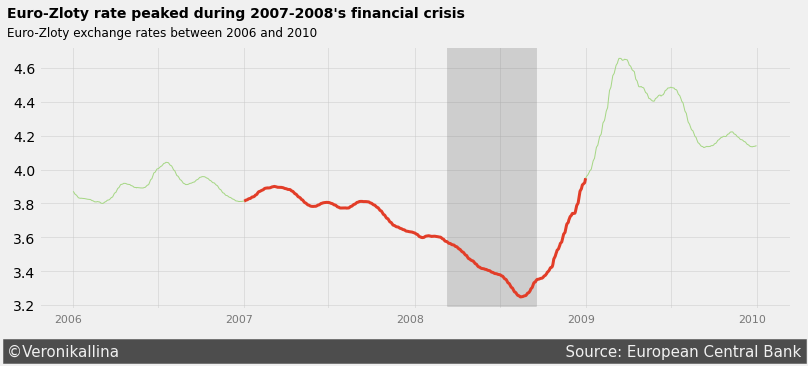

In [56]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,4.5))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.01,
           alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])


x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 3.1, year, alpha=0.5, fontsize=11)
    x += 365

## Adding a title and a subtitle    
ax.text(732172.0, 4.9, "Euro-Zloty rate peaked during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 4.79, 'Euro-Zloty exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 2.9, '©VeronikaIlina' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=15)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()


###Analysis 3. Coronavirus crisis

More about Coronavirus crisis in Poland

[COVID-19 pandemic in Poland](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Poland)

[Poland: investing in a greener, fairer economy will strengthen recovery from COVID-19 crisis](https://www.oecd.org/newsroom/poland-investing-in-a-greener-fairer-economy-will-strengthen-recovery-from-covid-19-crisis.htm)

In [57]:
coronavirus_crisis = euro_to_zloty.copy(
                   )[(euro_to_zloty['Time'].dt.year >= 2017
                   ) & (euro_to_zloty['Time'].dt.year <= 2022)]
coronavirus_crisis_drop = euro_to_zloty.copy(
                   )[(euro_to_zloty.Time.dt.year >= 2019
                   ) & (euro_to_zloty.Time.dt.year <= 2020)]

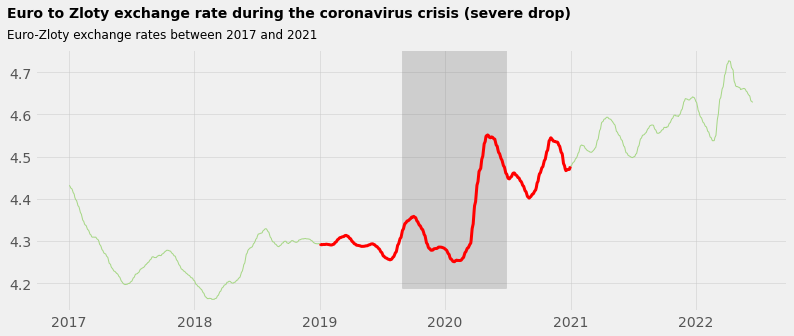

In [406]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(12,4.5))
ax.plot(coronavirus_crisis['Time'],
        coronavirus_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the period
ax.plot(coronavirus_crisis_drop['Time'],
        coronavirus_crisis_drop['rolling_mean'],
        linewidth=3, color='red') 

### Highlihting the crisis
ax.axvspan(xmin=737300.0, xmax=737602.0, ymin=0.09,
           alpha=0.3, color='grey')

## Adding a title and a subtitle    
ax.text(736150.0, 4.83, "Euro to Zloty exchange rate during the coronavirus crisis (severe drop)",
        weight='bold', color='black')
ax.text(736150.0, 4.78, 'Euro-Zloty exchange rates between 2017 and 2021',
        size=12, color='black')

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()